## Exploration des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path_blockchain_actor = "../../timeseries/blockchain_by_actor.csv"
path_external = "../../timeseries/external.csv"
path_global = "../../timeseries/global.csv" 

### Blockchain Actor

Ce fichier contient des séries temporelles décrivant les 100 acteurs ayant la plus grande activité (définie en nombre de jours d'activité) sur la période.

In [3]:
df_blch = pd.read_csv(path_blockchain_actor, index_col=0)
df_blch

,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
0,2015.0,1.0,1.0,HappyCoins.com,1.377590e+09,4.0,2015-01-01,49596.0,0.004957,4.0,1.277500e+09,0.0,0.0,8.0,1.277500e+09
1,2015.0,1.0,1.0,821,2.476057e+09,5.0,2015-01-01,10000.0,0.000851,1.0,1.174552e+09,0.0,0.0,2.0,1.174552e+09
2,2015.0,1.0,1.0,FortuneJack.com,1.201470e+08,29.0,2015-01-01,83000.0,0.194670,11.0,1.541127e+08,14158970.0,14158970.0,22.0,1.399538e+08
3,2015.0,1.0,1.0,396,1.906135e+10,70.0,2015-01-01,540000.0,0.023738,54.0,1.842989e+10,0.0,0.0,108.0,1.842989e+10
4,2015.0,1.0,1.0,SatoshiMines.com,7.401319e+08,193.0,2015-01-01,740000.0,0.447934,45.0,1.813624e+09,35044568.0,35044568.0,84.0,1.778579e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90398,0.0,0.0,0.0,BTCJam.com,0.000000e+00,0.0,2017-06-17,145053.0,8.643929,1.0,1.387984e+06,0.0,0.0,2.0,1.387984e+06
90399,0.0,0.0,0.0,7277,0.000000e+00,0.0,2017-06-18,26600900.0,49.327293,266.0,7.252800e+05,0.0,0.0,532.0,7.252800e+05
90400,0.0,0.0,0.0,70063369,0.000000e+00,0.0,2017-06-22,284134.0,0.301961,1.0,9.352789e+07,0.0,0.0,1.0,9.352789e+07
90401,0.0,0.0,0.0,Loanbase.com,0.000000e+00,0.0,2017-06-29,131862.0,1.415791,1.0,9.049938e+06,0.0,0.0,2.0,9.049938e+06


- **identity** : Identifiant de l'acteur, pouvant être un nom ou un numéro unique
- **received** : Total des montants reçu
- **spent** : Total des montants versé
- **nb_received** : Nombre de sorties de transactions reçues par l'acteur
- **nb_transactions** : Nombres de transactions faites par l'acteur
- **nb_spent** : Nombre de paiements faits par l'acteur (1 transaction = 1 ou plusieurs paiements).
- **sum_fee** : Total des frais de transactions payés par l'acteur pour les transactions dont il est la source
- **mean_fee_for100** : Moyenne des frais payés par transaction
- **self_spent** : Montants observés comme envoyés de l'acteur à lui-même
- **self_spent_estimated** : Montants estimés comme probable envoie de l'acteur à lui-même, mais vers des adresses que nous ne connaissons pas. Cette valuer est forcément supérieure à self_spent.


In [4]:
print(df_blch['identity'].unique())

['HappyCoins.com' '821' 'FortuneJack.com' '396' 'SatoshiMines.com' '0'
 '641' 'Rollin.io' 'SatoshiDice.com' 'Loanbase.com' 'Bitstamp.net' '289'
 'Paymium.com' '417' 'YoBit.net' 'FYBSG.com' '1391' '101' 'Poloniex.com'
 '469' '61400549' 'Bitbond.com' 'ePay.info_CoinJoinMess' '70063369'
 '71842975' 'HolyTransaction.com' '107' '16621' '5162' '61'
 'SlushPool.com' 'BTCJam.com' 'Matbea.com' '18972' 'TheRockTrading.com'
 'Huobi.com' 'HaoBTC.com' 'SafeDice.com' 'CoinSpot.com.au' '1805' '1138'
 'CoinMotion.com' 'Xapo.com' '898' 'CoinGaming.io' 'OKCoin.com'
 'BitZillions.com' '175' '523' 'SecondsTrade.com' 'BitcoinFog'
 '999Dice.com' 'BX.in.th' 'SimpleCoin.cz' '7277' '227' 'BTC-e.com'
 'PocketDice.io' '348' '73832915' '72472408' 'BitBargain.co.uk' 'Bter.com'
 '269' '35' '74304487' '69383113' '71554939' '57' 'BtcTrade.com' '421'
 'Cryptonator.com' 'BTCC.com' '1149' 'CoinPayments.net' 'CoinCafe.com'
 '1226' 'CoinTrader.net_LocalBitcoins.com' 'LuckyB.it' '154'
 'MercadoBitcoin.com.br' '73963652' 'B

In [5]:
df_amount = df_blch[['identity', 'received', 'spent']].groupby('identity').mean()
actors_received = df_amount.sort_values(by='received', ascending=False)
actors_received

,received,spent
identity,,
Huobi.com,1.440429e+12,8.546435e+11
ePay.info_CoinJoinMess,1.303645e+12,1.282373e+12
Bitstamp.net,7.673049e+11,4.554055e+11
BTC-e.com,5.888792e+11,2.817387e+11
OKCoin.com,5.032114e+11,1.680968e+11
...,...,...
18972,2.779030e+08,2.776104e+08
72472408,2.503300e+08,2.504136e+08
419,9.187516e+07,8.553475e+07


In [6]:
actors_spent = df_amount.sort_values(by='spent', ascending=False)
actors_spent

,received,spent
identity,,
ePay.info_CoinJoinMess,1.303645e+12,1.282373e+12
Huobi.com,1.440429e+12,8.546435e+11
Bitstamp.net,7.673049e+11,4.554055e+11
Poloniex.com,4.752017e+11,3.994841e+11
BTCC.com,3.531440e+11,2.954789e+11
...,...,...
18972,2.779030e+08,2.776104e+08
72472408,2.503300e+08,2.504136e+08
419,9.187516e+07,8.553475e+07


#### Identification des principaux acteurs 

C:\Users\chars\AppData\Local\Temp\ipykernel_16148\405470980.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(names_actors, fontsize=6)
C:\Users\chars\AppData\Local\Temp\ipykernel_16148\405470980.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(names_actors_spent, fontsize=6)


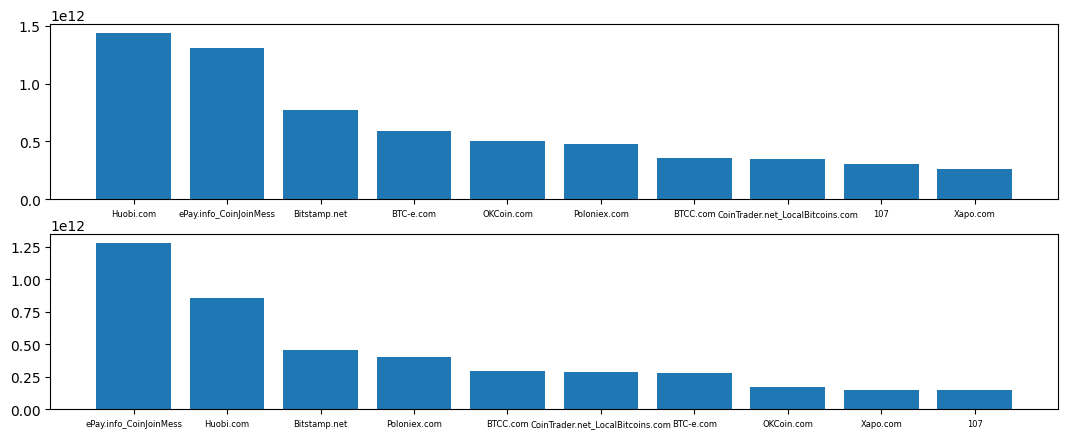

In [7]:
names_actors = actors_received['received'].index[:10]
names_actors_spent = actors_spent['spent'].index[:10]

fig, ax = plt.subplots(2, 1, figsize=(13, 5))
ax[0].bar(names_actors, actors_received['received'][:10])
ax[0].set_xticklabels(names_actors, fontsize=6)

ax[1].bar(names_actors_spent, actors_spent['spent'][:10])
ax[1].set_xticklabels(names_actors_spent, fontsize=6)
plt.show()

In [8]:
actor0 = df_blch[df_blch['identity'] == names_actors[0]]
actor1 = df_blch[df_blch['identity'] == names_actors[1]]
actor2 = df_blch[df_blch['identity'] == names_actors[2]]

actor0

,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
35,2015.0,1.0,1.0,Huobi.com,5.952196e+11,842.0,2015-01-01,990000.0,0.005587,129.0,9.840645e+11,3.822187e+11,7.500509e+11,243.0,2.340136e+11
161,2015.0,1.0,2.0,Huobi.com,4.908216e+11,828.0,2015-01-02,870000.0,0.004418,116.0,7.631602e+11,2.763843e+11,4.551452e+11,213.0,3.080150e+11
238,2015.0,1.0,3.0,Huobi.com,1.172157e+12,1177.0,2015-01-03,2230000.0,0.003771,315.0,1.854893e+12,7.005021e+11,1.198489e+12,589.0,6.564042e+11
310,2015.0,1.0,4.0,Huobi.com,1.809074e+12,1352.0,2015-01-04,3440000.0,0.005486,401.0,2.773218e+12,9.728689e+11,1.757193e+12,792.0,1.016025e+12
445,2015.0,1.0,5.0,Huobi.com,1.863153e+12,1360.0,2015-01-05,2360000.0,0.005085,345.0,2.365131e+12,4.963882e+11,1.392235e+12,664.0,9.728961e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89942,2017.0,6.0,26.0,Huobi.com,6.536412e+11,1681.0,2017-06-26,63647976.0,0.013922,84.0,6.343454e+11,1.837757e+11,1.837757e+11,912.0,4.505696e+11
90044,2017.0,6.0,27.0,Huobi.com,1.142965e+12,1649.0,2017-06-27,55178639.0,0.018111,97.0,1.108216e+12,3.799185e+11,3.799185e+11,787.0,7.282973e+11
90117,2017.0,6.0,28.0,Huobi.com,2.858601e+11,1616.0,2017-06-28,51396335.0,0.018473,88.0,4.465773e+11,1.550212e+11,1.550212e+11,700.0,2.915561e+11
90214,2017.0,6.0,29.0,Huobi.com,2.855245e+11,1460.0,2017-06-29,47560076.0,0.023648,88.0,3.719344e+11,1.460383e+11,1.460383e+11,611.0,2.258961e+11


RECEIVED


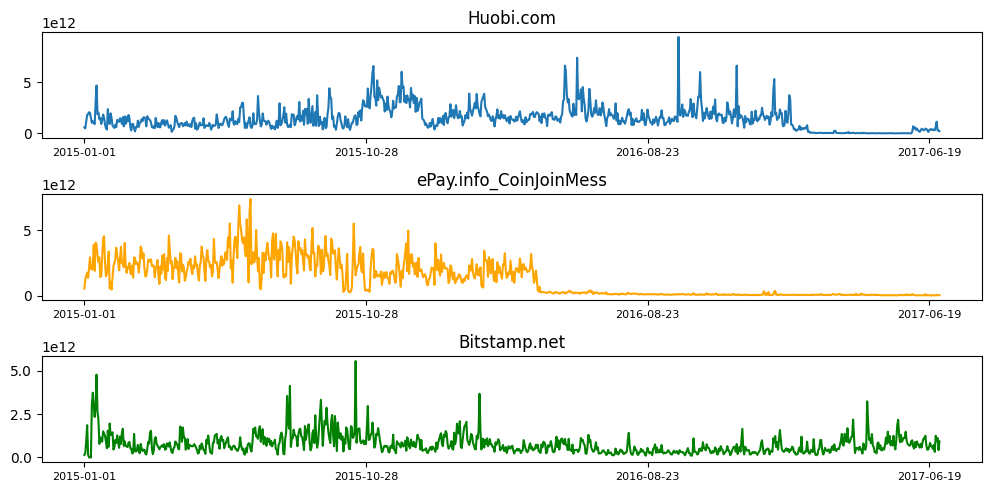

In [9]:
print("RECEIVED")
fig = plt.figure(figsize=(10, 5))


plt.subplot(3, 1, 1)
plt.title(str(names_actors[0]))
plt.plot(actor0['date'], actor0['received'])
x = plt.xticks(actor0['date'][::300], size=8)

plt.subplot(3, 1, 2)
plt.title(str(names_actors[1]))
plt.plot(actor1['date'], actor1['received'], c='orange')
x = plt.xticks(actor1['date'][::300], size=8)

plt.subplot(3, 1, 3)
plt.title(str(names_actors[2]))
plt.plot(actor2['date'], actor2['received'], c='green')
x = plt.xticks(actor1['date'][::300], size=8)
fig.tight_layout(pad=1.0)

SENDING


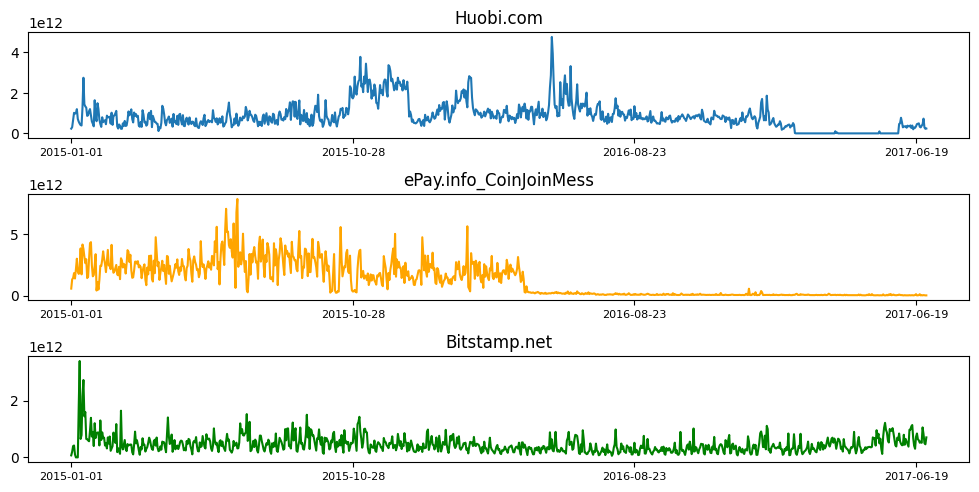

In [10]:
print("SENDING")
fig = plt.figure(figsize=(10, 5))


plt.subplot(3, 1, 1)
plt.title(str(names_actors[0]))
plt.plot(actor0['date'], actor0['spent'])
x = plt.xticks(actor0['date'][::300], size=8)

plt.subplot(3, 1, 2)
plt.title(str(names_actors[1]))
plt.plot(actor1['date'], actor1['spent'], c='orange')
x = plt.xticks(actor1['date'][::300], size=8)

plt.subplot(3, 1, 3)
plt.title(str(names_actors[2]))
plt.plot(actor2['date'], actor2['spent'], c='green')
x = plt.xticks(actor1['date'][::300], size=8)
fig.tight_layout(pad=1.0)

#### Sum fee

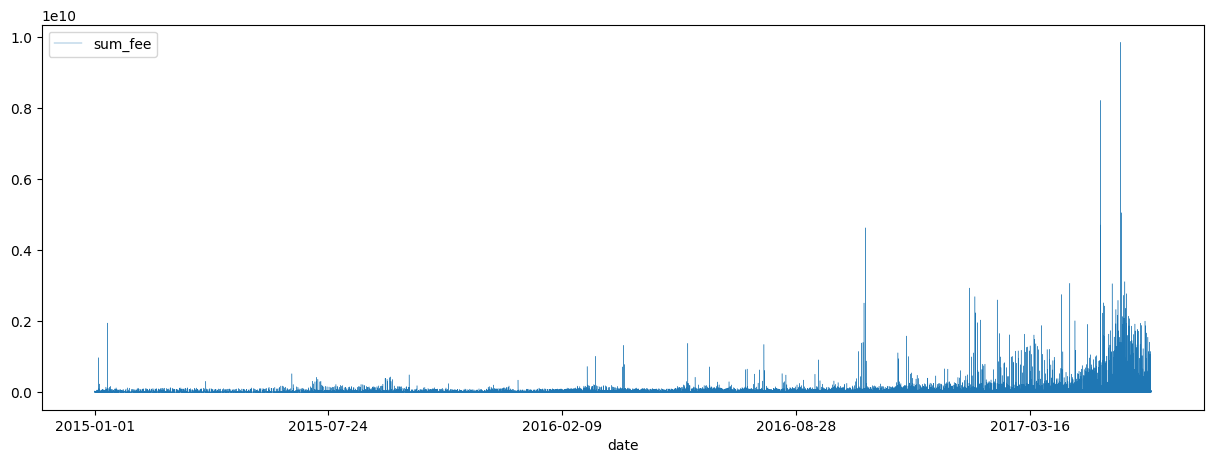

In [25]:

df_blch.plot(x='date', y='sum_fee', lw='0.3', figsize=(15, 5))
plt.show()

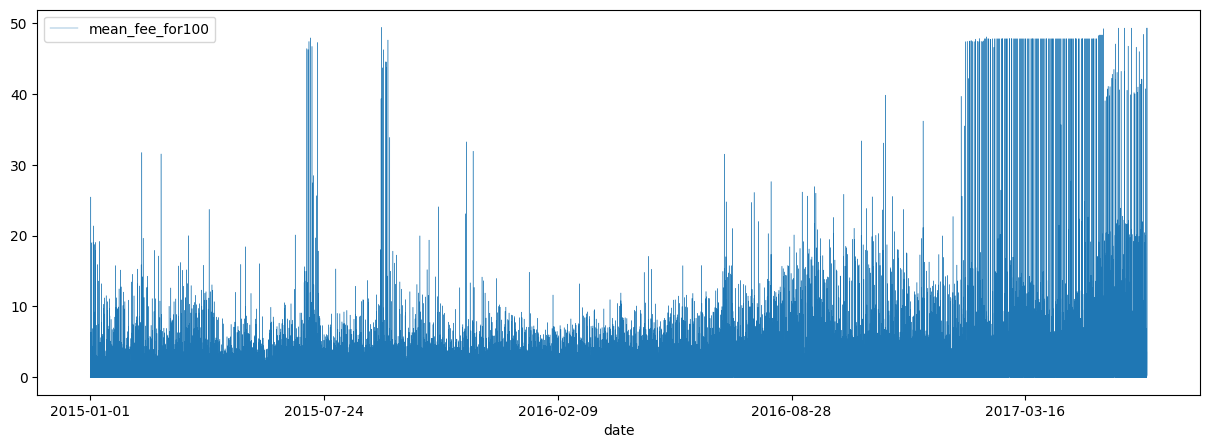

In [28]:
df_blch.plot(x='date', y='mean_fee_for100', lw='0.3', figsize=(15, 5))
plt.show()

## External

Ce fichier contient 2 séries temporelles, concernant des données qui ne sont pas issues de la blockchain Bitcoin, mais qui concernent l'économie Bitcoin

In [12]:
df_external = pd.read_csv(path_external, index_col=0)
df_external

,date,PriceUSD,HashRate
2190,2015-01-02,315.942732,3.333450e+05
2191,2015-01-03,285.647310,3.272842e+05
2192,2015-01-04,263.334575,3.474869e+05
2193,2015-01-05,275.003852,3.151626e+05
2194,2015-01-06,287.549521,3.192031e+05
...,...,...,...
3096,2017-06-26,2426.365051,5.023770e+06
3097,2017-06-27,2530.345536,4.634604e+06
3098,2017-06-28,2562.792264,5.554450e+06
3099,2017-06-29,2540.443032,4.245439e+06


**PriceUSD**: la valeur moyenne observée d'un Bitcoin en US dollar sur la journée sur les principales plateformes d'échange <br> 
**HashRate**: Le HashRate (Taux de hachage), une mesure de la puissance de calcul totale utilisée par les miners : https://en.bitcoinwiki.org/wiki/Hashrate